## KNN

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [3]:
X.isna().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

По каждому столбцу пропущенных значений нет.

In [4]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Категориальных переменных нет.

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[['alcohol', 'magnesium']])
x_test_scaled = scaler.fit_transform(x_test[['alcohol', 'magnesium']])

In [7]:
classifiers = []
print("NN \t Train\tTest")
for i in [1, 3, 5, 10, 15, 25]:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train_scaled, y_train)
    train_accuracy = accuracy_score(y_train, neigh.predict(x_train_scaled))
    test_accuracy = accuracy_score(y_test, neigh.predict(x_test_scaled))
    print(f"{i}\t {round(train_accuracy, 2)}\t{round(test_accuracy, 2)}")
    classifiers.append(neigh)

NN 	 Train	Test
1	 0.99	0.7
3	 0.84	0.74
5	 0.81	0.74
10	 0.81	0.78
15	 0.78	0.78
25	 0.73	0.72


In [8]:
!pip install mlxtend

In [9]:
import mlxtend

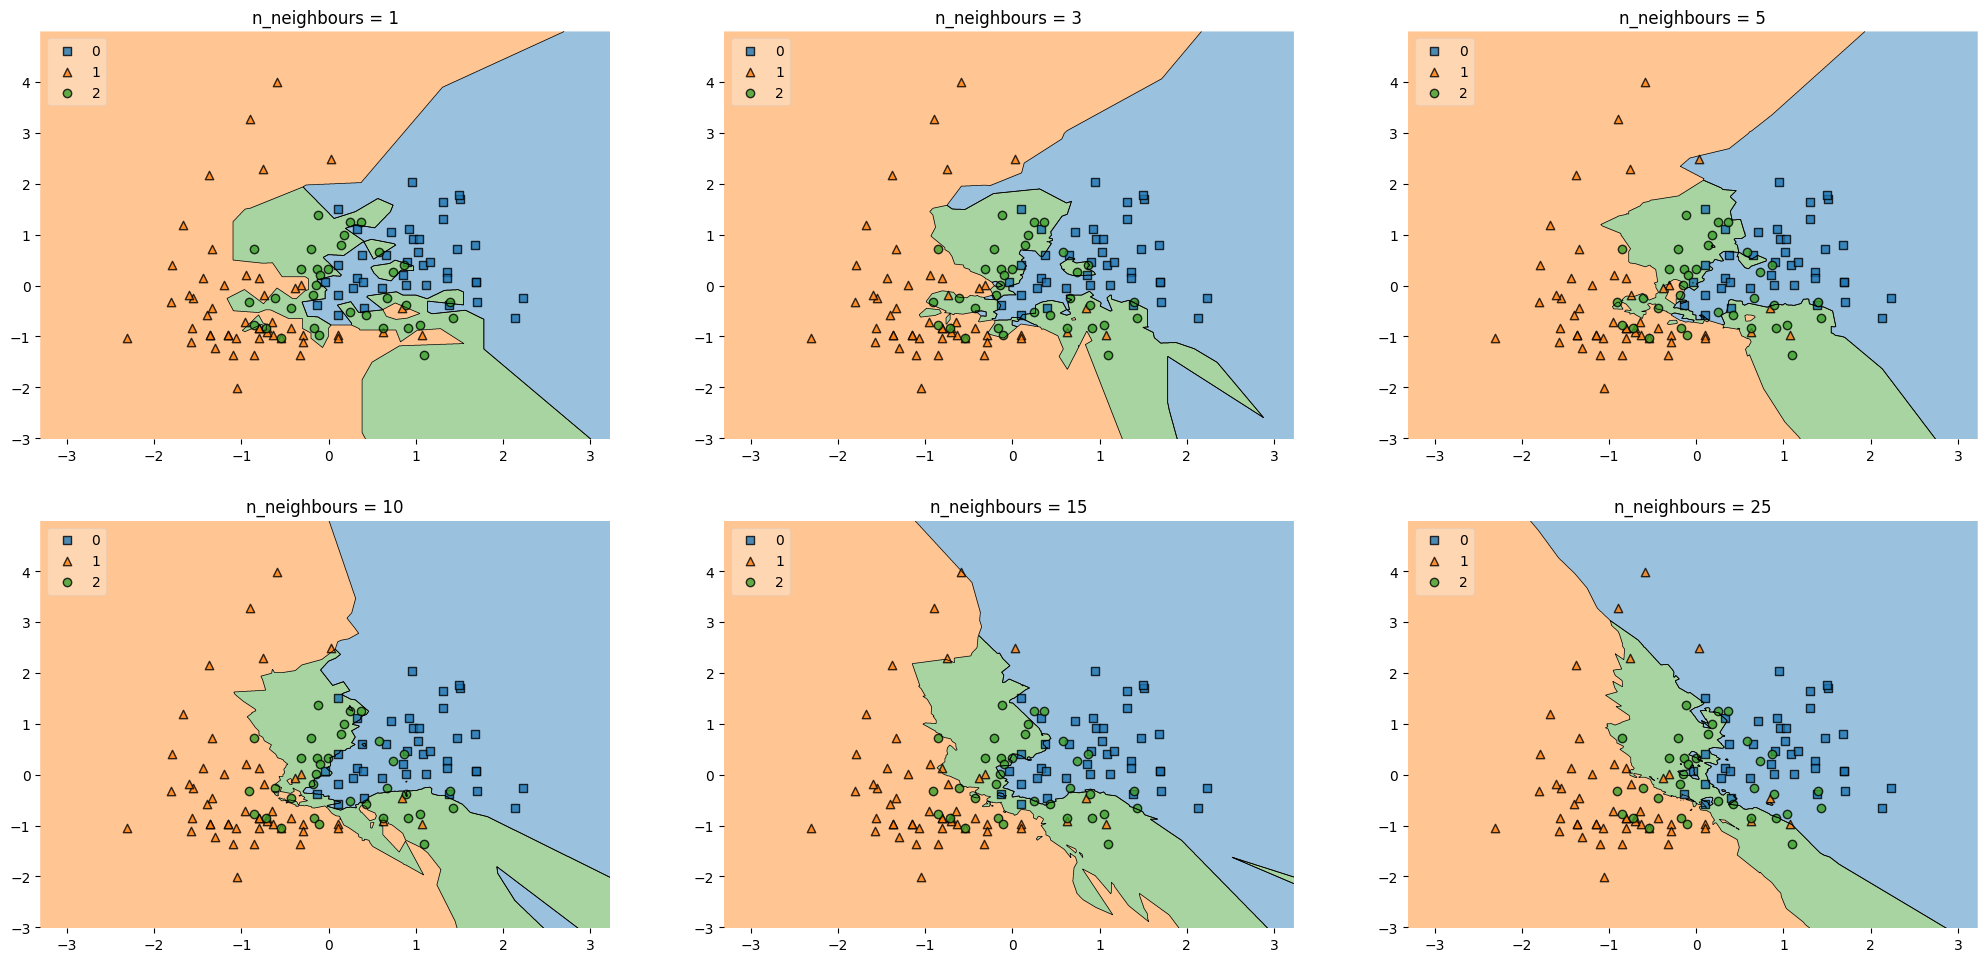

In [12]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(25,18))

labels = [f"n_neighbours = {k}" for k in [1, 3, 5, 10, 15, 25]]
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(x_train_scaled), y=np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()


Оптимальным числом соседей будет являться $k = 10$, т.к. при нем мы получаем наибольшую точность на обучающей и тестовой выборках, а график представляет из себя три области, что значит мы сможем более просто отделить их друг от друга, чем если у нас было бы множество маленьких кусочков.

In [13]:
from collections import Counter 

class KNN:
    def __init__(self, k: int):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x_test in X:
            distances = np.sqrt(np.sum((self.X_train - x_test) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            most_common_label = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)
        return np.array(predictions)

In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
test_knn(KNN)

## Линейная регрессия.

In [3]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропусков нет.

In [5]:
for col in data.columns:
    print(f"{col}\t{len(data[col].unique())}")

Unnamed: 0	53940
carat	273
cut	5
color	7
clarity	8
depth	184
table	127
price	11602
x	554
y	552
z	375


Бессмысленный столбец здесь - ```Unnamed: 0```, т.к. он по сути просто выполняет роль индекса, удаляем его:

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

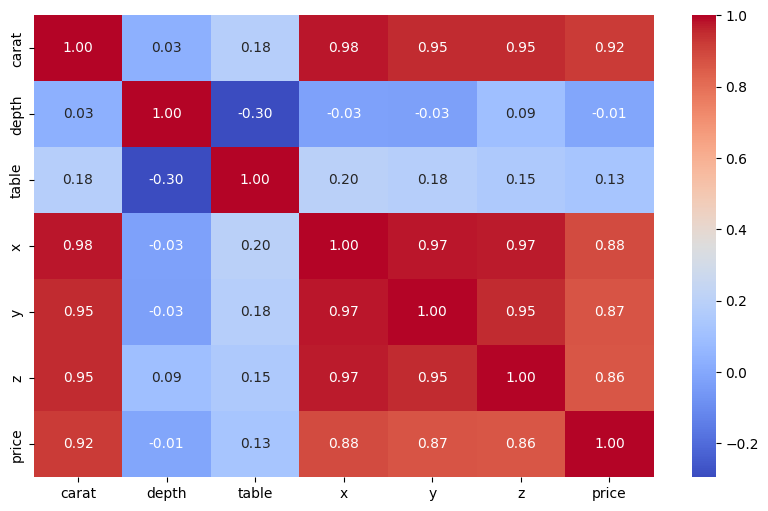

In [8]:
import seaborn as sns
metric_vars = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
plt.figure(figsize=(10,6))
ax = sns.heatmap(data[metric_vars].corr(), cmap="coolwarm", annot=True, fmt="0.2f")

С целевой переменной больше всего коррелируют:
 - вес бриллианта в каратах;
 - длина кристалла;
 - его ширина;
 - высота.

In [9]:
categorical_vars = ['cut', 'color', 'clarity']
data = pd.get_dummies(data, drop_first=True, columns=categorical_vars, dtype=int)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = data.drop('price', axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(mse_train)
print(mse_test)

1290541.914745062
1244765.4357158726


In [15]:
print(x_train.columns[0:6])
model.coef_[0:6]

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


array([ 1.12262051e+04, -6.31199113e+01, -2.70960563e+01, -9.80549238e+02,
       -5.63315299e+00, -4.81547644e+01])

Наибольший вклад в предсказываемую переменную вносят: ```carat``` и ```x```.

In [19]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.1)
ls.fit(x_train, y_train)
pred_train = ls.predict(x_train)
pred_test = ls.predict(x_test)
print(root_mean_squared_error(pred_train,y_train))
print(root_mean_squared_error(pred_test,y_test))

1136.041610733112
1115.5034324750454


In [20]:
for col, coef in zip(x_train.columns, ls.coef_):
    print(col,"\t", coef)

carat 	 11208.579464956487
depth 	 -63.79662740052934
table 	 -27.431580589285645
x 	 -976.2217449714772
y 	 -4.967537350443017
z 	 -46.33885949722517
cut_Good 	 585.1044543665557
cut_Ideal 	 835.926824857387
cut_Premium 	 767.5702411489616
cut_Very Good 	 733.6160933793332
color_E 	 -211.6603887744564
color_F 	 -267.96965866419583
color_G 	 -494.27896836710033
color_H 	 -992.4859819032954
color_I 	 -1468.8546248151124
color_J 	 -2373.586347685196
clarity_IF 	 5402.2014848206545
clarity_SI1 	 3698.865327235739
clarity_SI2 	 2729.6268169787486
clarity_VS1 	 4603.898098470115
clarity_VS2 	 4283.60605038737
clarity_VVS1 	 5046.456622284544
clarity_VVS2 	 4974.081914667934


Неинформативные:
- ```x, y, z``` - размеры по трем измерениям сильно коррелируют, из-за чего неинформативны

Наиболее информативные:
- ```carat``` - от веса бриллианта зависит его цена, очевидно
- ```clarity_IF``` - если бриллиант наилучшего качества, то он тоже будет дороже(все последующие значения этого же параметра аналогично)

In [21]:
print(root_mean_squared_error(y_test, model.predict(x_test)), root_mean_squared_error(y_test, pred_test))

1115.6905645006918 1115.5034324750454


Ошибки моделей примерно равны, у ```Lasso``` чуть меньше, возможно стоит использовать ее, так как она избавляет от хоть и небольшой проблемы мультиколлинеарности.